In [34]:
import pandas as pd
import numpy as np
import kaggle
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

%matplotlib inline

In [35]:
kaggle.api.authenticate()
kaggle.api.competition_download_files('titanic', path='./titanic_data')

with zipfile.ZipFile('./titanic_data/titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('./titanic_data')

os.remove('./titanic_data/titanic.zip')

train_df = pd.read_csv('./titanic_data/train.csv')
test_df = pd.read_csv('./titanic_data/test.csv')

In [36]:
# Selection of variables
train_df = train_df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

train_df['Survived_str'] = train_df['Survived'].map({0: 'No', 1: 'Yes'})
train_df['Sex_int'] = train_df['Sex'].map({'male': 0, 'female': 1})

train_df = train_df[['Survived', 'Survived_str', 'Sex', 'Sex_int', 'Age', 'Pclass', 'Fare']]

print(train_df.head(15))

    Survived Survived_str     Sex  Sex_int   Age  Pclass     Fare
0          0           No    male        0  22.0       3   7.2500
1          1          Yes  female        1  38.0       1  71.2833
2          1          Yes  female        1  26.0       3   7.9250
3          1          Yes  female        1  35.0       1  53.1000
4          0           No    male        0  35.0       3   8.0500
5          0           No    male        0   NaN       3   8.4583
6          0           No    male        0  54.0       1  51.8625
7          0           No    male        0   2.0       3  21.0750
8          1          Yes  female        1  27.0       3  11.1333
9          1          Yes  female        1  14.0       2  30.0708
10         1          Yes  female        1   4.0       3  16.7000
11         1          Yes  female        1  58.0       1  26.5500
12         0           No    male        0  20.0       3   8.0500
13         0           No    male        0  39.0       3  31.2750
14        

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Survived_str  891 non-null    object 
 2   Sex           891 non-null    object 
 3   Sex_int       891 non-null    int64  
 4   Age           714 non-null    float64
 5   Pclass        891 non-null    int64  
 6   Fare          891 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [38]:
train_df.shape

(891, 7)

In [39]:
# How many NA?
print(train_df.isna().sum())
print(' ')
print(train_df.isna().mean() * 100)  # %

Survived          0
Survived_str      0
Sex               0
Sex_int           0
Age             177
Pclass            0
Fare              0
dtype: int64
 
Survived         0.00000
Survived_str     0.00000
Sex              0.00000
Sex_int          0.00000
Age             19.86532
Pclass           0.00000
Fare             0.00000
dtype: float64


---

In [40]:
print(train_df.describe())

         Survived     Sex_int         Age      Pclass        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000
mean     0.383838    0.352413   29.699118    2.308642   32.204208
std      0.486592    0.477990   14.526497    0.836071   49.693429
min      0.000000    0.000000    0.420000    1.000000    0.000000
25%      0.000000    0.000000   20.125000    2.000000    7.910400
50%      0.000000    0.000000   28.000000    3.000000   14.454200
75%      1.000000    1.000000   38.000000    3.000000   31.000000
max      1.000000    1.000000   80.000000    3.000000  512.329200


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

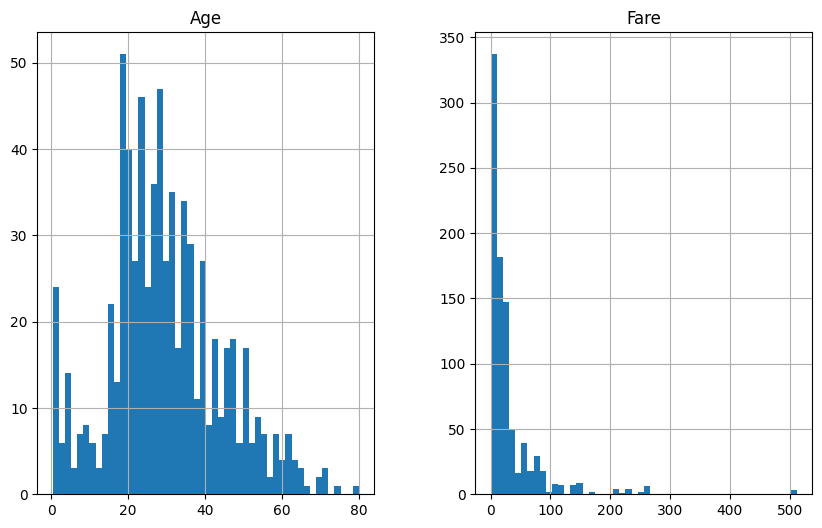

In [41]:
train_df[['Age', 'Fare']].hist(bins=50, figsize=(10, 6))

In [42]:
train_df['Fare_log'] = np.log1p(train_df['Fare'])

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare_log'}>]], dtype=object)

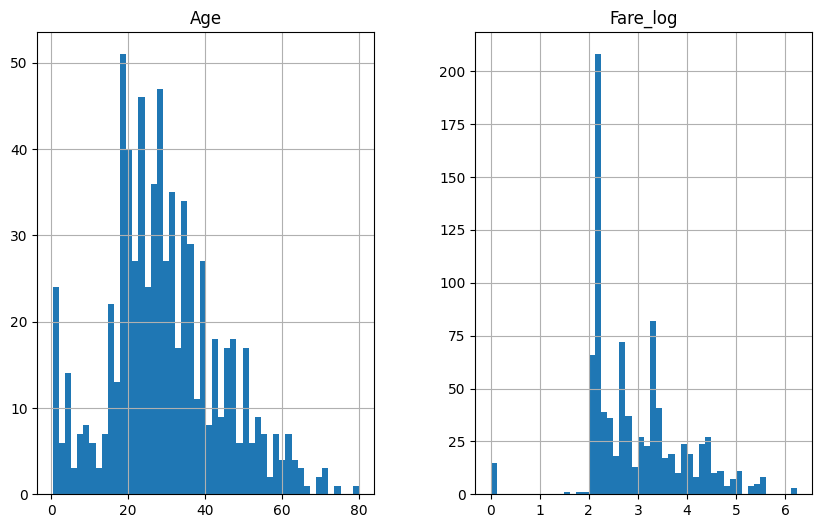

In [43]:
train_df[['Age', 'Fare_log']].hist(bins=50, figsize=(10, 6))

---

### Age of Titanic passengers

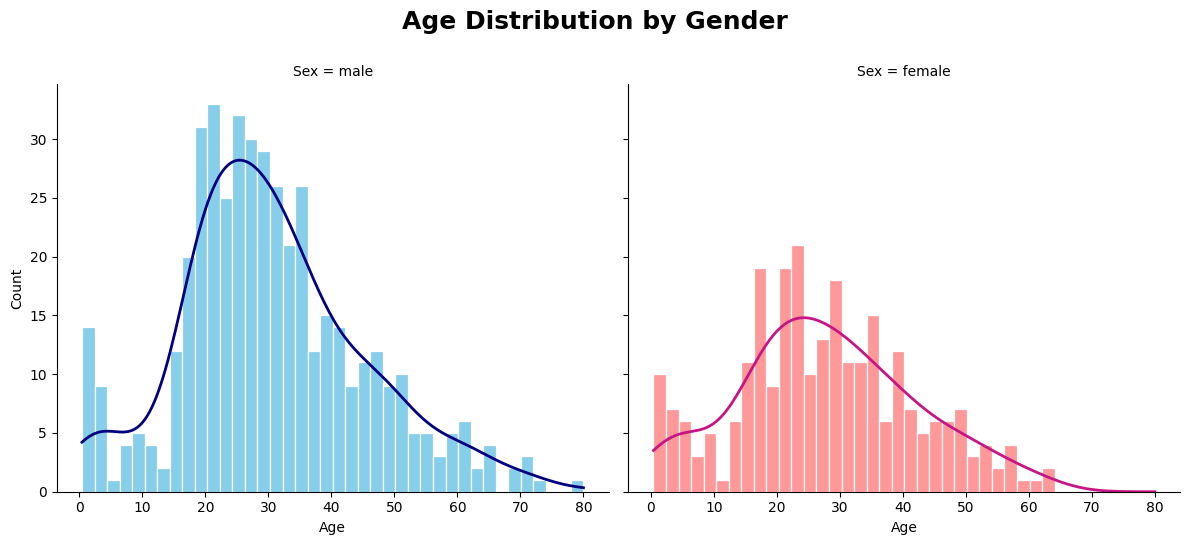

In [44]:
g = sns.displot(data=train_df,
                x='Age',
                col='Sex',
                kde=True,
                bins=40,
                alpha=0.7,
                height=5,
                aspect=1.2)

colors = {'male': '#87CEEB', 'female': '#FF9999'}
kde_colors = {'male': '#000080', 'female': '#C71585'}

for (col_val, ax) in zip(['male', 'female'], g.axes.flat):

    for patch in ax.patches:
        patch.set_facecolor(colors[col_val])
        patch.set_edgecolor('white')
    
    for line in ax.lines:
        line.set_color(kde_colors[col_val])
        line.set_linewidth(2)

g.fig.suptitle('Age Distribution by Gender', 
               fontsize=18, 
               fontweight='bold',
               y=1.08)

plt.show()

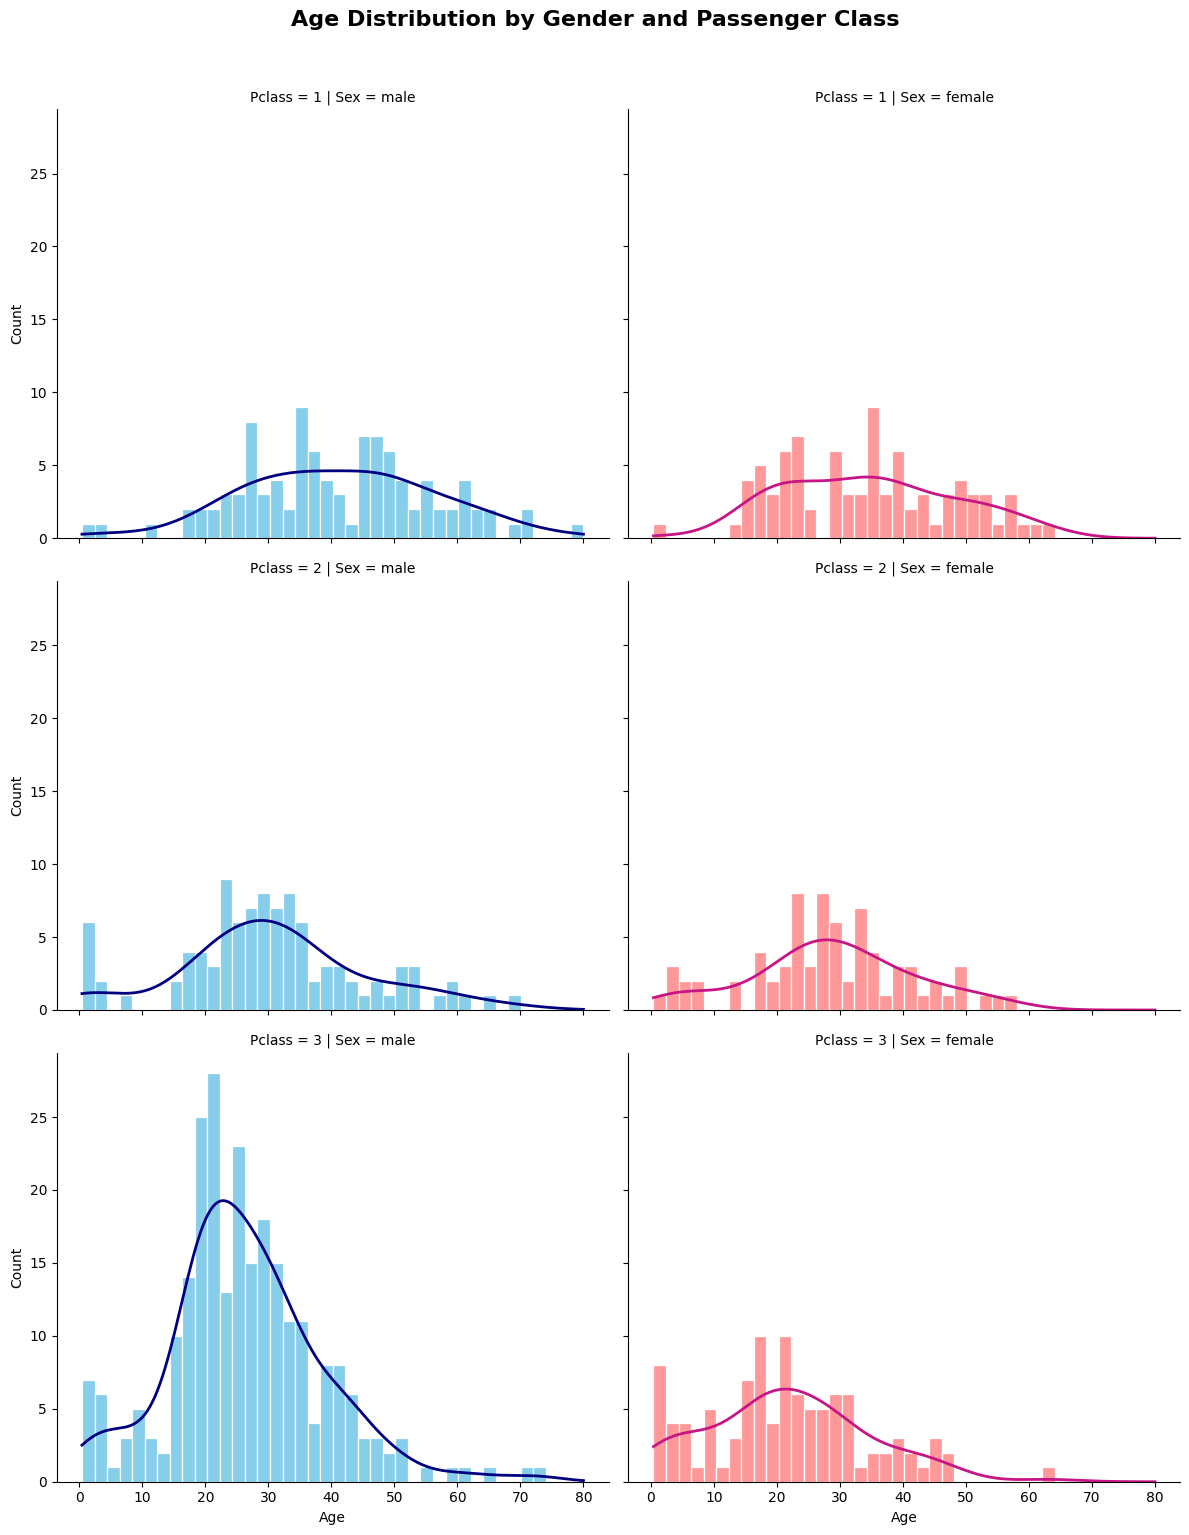

In [45]:
g = sns.displot(data=train_df,
                x='Age',
                col='Sex',
                row='Pclass',  
                kde=True,
                bins=40,
                alpha=0.7,
                height=5,
                aspect=1.2)

colors = {'male': '#87CEEB', 'female': '#FF9999'}
kde_colors = {'male': '#000080', 'female': '#C71585'}

for (pclass, sex), ax in g.axes_dict.items():

    for patch in ax.patches:
        patch.set_facecolor(colors[sex])
        patch.set_edgecolor('white')
    
    for line in ax.lines:
        line.set_color(kde_colors[sex])
        line.set_linewidth(2)

g.fig.suptitle('Age Distribution by Gender and Passenger Class', 
               fontsize=16, 
               fontweight='bold',
               y=1.02)

plt.tight_layout()
plt.show()

In [46]:
for sex in ['male', 'female']:
    print(f"Average age of {sex} - {round(train_df[train_df['Sex'] == sex]['Age'].mean(), 2)} years")
    for pclass in [1, 2, 3]:
        print(f"Average age of {sex} in {pclass}st class - {round(train_df[(train_df['Sex'] == sex) & (train_df['Pclass'] == pclass)]['Age'].mean(), 2)} years")
    print()

print(f"Average age of Titanic passenger - {round(train_df['Age'].mean(), 2)} year")

Average age of male - 30.73 years
Average age of male in 1st class - 41.28 years
Average age of male in 2st class - 30.74 years
Average age of male in 3st class - 26.51 years

Average age of female - 27.92 years
Average age of female in 1st class - 34.61 years
Average age of female in 2st class - 28.72 years
Average age of female in 3st class - 21.75 years

Average age of Titanic passenger - 29.7 year


---

### Is there a link between age and ticket price?

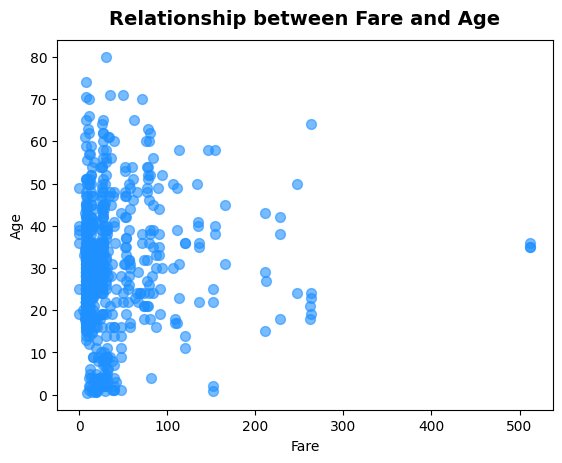

In [47]:
ax = sns.regplot(
    x="Fare", 
    y="Age", 
    data=train_df,
    scatter_kws={'color': '#1E90FF', 'alpha': 0.6, 's': 50},  
    scatter=True,  
    fit_reg=False  
)

ax.set_title("Relationship between Fare and Age", fontsize=14, fontweight='bold', y=1.02)

plt.show()

There is no obvious link

---

### How many peoples survived in the Titanic?

In [48]:
print(train_df['Survived_str'].value_counts())

Survived_str
No     549
Yes    342
Name: count, dtype: int64


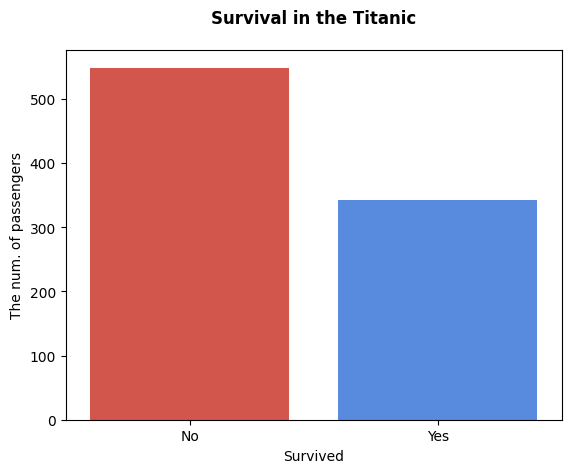

In [49]:
colors = ['#EA4335', '#4285F4']

sns.countplot(data=train_df,
              x='Survived_str',
              hue='Survived_str',
              palette=colors,
              legend=False)

plt.title('Survival in the Titanic', fontweight='bold', y=1.05)
plt.xlabel('Survived')
plt.ylabel('The num. of passengers')

plt.show()

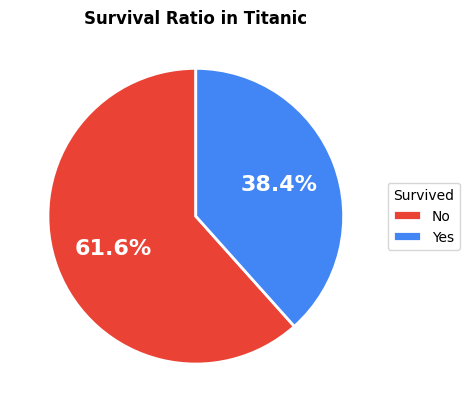

In [50]:
colors = ['#EA4335', '#4285F4']

survival_counts = train_df['Survived_str'].value_counts()

wedges, texts, autotexts = plt.pie(survival_counts.values, 
        labels=survival_counts.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 16, 'fontweight': 'bold', 'color': 'white'},
        wedgeprops={'edgecolor': 'white', 'linewidth': 2})

plt.title('Survival Ratio in Titanic', fontweight='bold')
plt.legend(wedges, survival_counts.index, title="Survived", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Survived less than half of the passengers Titanic

---

### Survival in the Titanic by sex

In [51]:
print(train_df.groupby('Sex')['Survived_str'].value_counts())

Sex     Survived_str
female  Yes             233
        No               81
male    No              468
        Yes             109
Name: count, dtype: int64


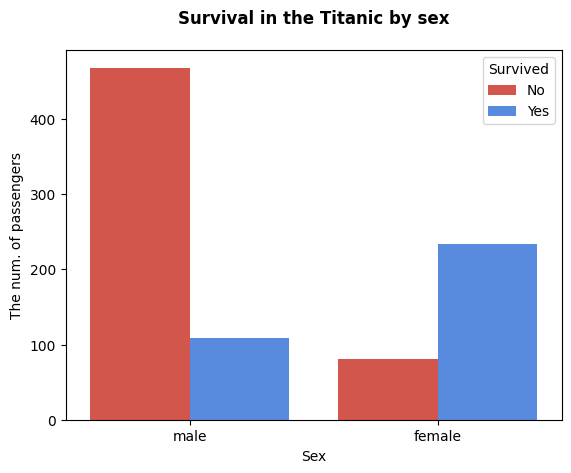

In [52]:
colors = ['#EA4335', '#4285F4']

sns.countplot(data=train_df, 
              x='Sex', 
              hue='Survived_str', 
              palette=colors)

plt.title('Survival in the Titanic by sex', fontweight='bold', y=1.05)
plt.xlabel('Sex')
plt.ylabel('The num. of passengers')
plt.legend(title='Survived')
plt.show()

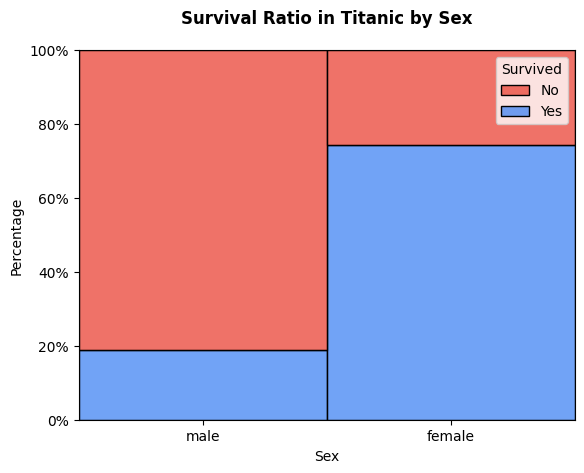

In [53]:
colors = ['#EA4335', '#4285F4'] 

sns.histplot(
    data=train_df,
    x='Sex',
    hue='Survived_str',
    multiple='fill',
    palette=colors
)

plt.title('Survival Ratio in Titanic by Sex', fontweight='bold', y=1.05)
plt.xlabel('Sex')
plt.ylabel('Percentage')

legend = plt.gca().get_legend()
legend.set_title('Survived')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

---

### Survival in the Titanic by class and sex

In [54]:
print(train_df.groupby(['Sex', 'Pclass'])['Survived_str'].value_counts())

Sex     Pclass  Survived_str
female  1       Yes              91
                No                3
        2       Yes              70
                No                6
        3       No               72
                Yes              72
male    1       No               77
                Yes              45
        2       No               91
                Yes              17
        3       No              300
                Yes              47
Name: count, dtype: int64


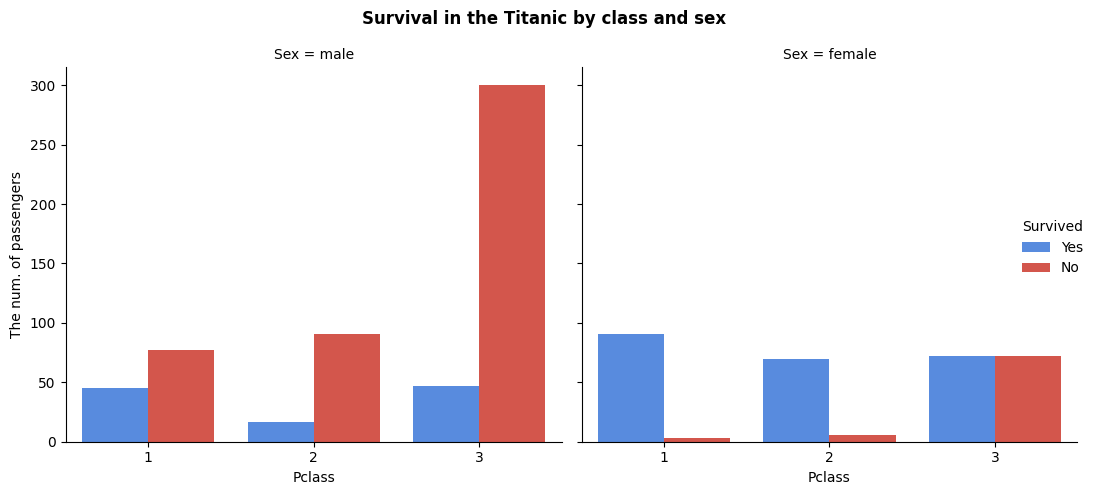

In [55]:
colors = ['#4285F4', '#EA4335'] 

g = sns.catplot(data=train_df,
                x='Pclass',
                col='Sex',  
                hue='Survived_str',
                kind='count',
                palette=colors)

g._legend.set_title('Survived')
g.set_ylabels('The num. of passengers') 
plt.suptitle('Survival in the Titanic by class and sex', fontweight='bold')
plt.tight_layout()
plt.show()

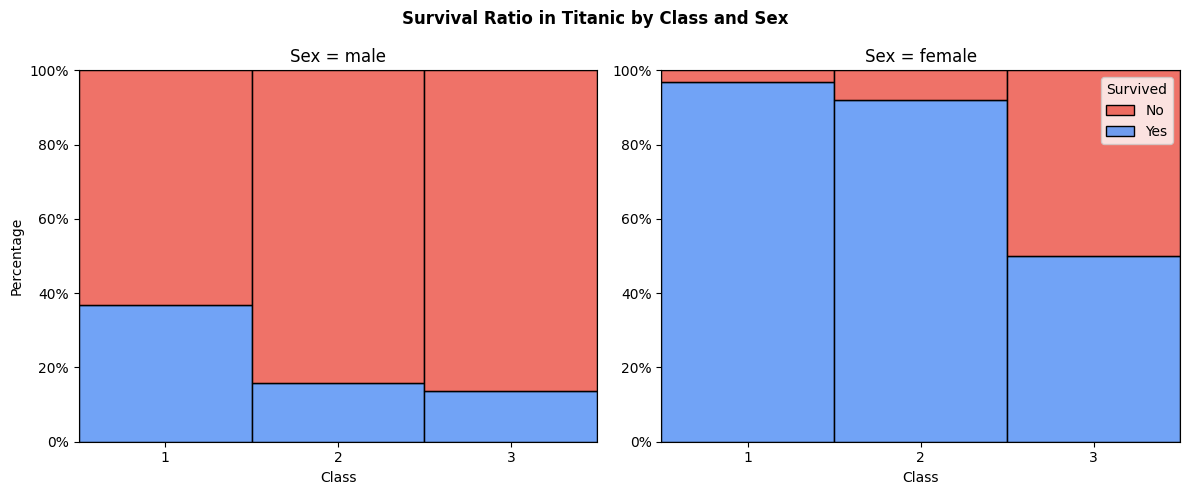

In [56]:
colors = ['#EA4335', '#4285F4']  

train_df['Pclass_str'] = pd.Categorical(train_df['Pclass'].astype(str), 
                                        categories=['1', '2', '3'], 
                                        ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sexes = ['male', 'female']

for i, sex in enumerate(sexes):
    sex_data = train_df[train_df['Sex'] == sex]
    
    sns.histplot(data=sex_data,
                 x='Pclass_str',
                 hue='Survived_str',
                 hue_order=['No', 'Yes'],  
                 multiple='fill',
                 palette=colors,
                 ax=axes[i],
                 discrete=True)  
    
    axes[i].set_title(f'Sex = {sex}')
    axes[i].yaxis.set_major_formatter(PercentFormatter(1))
    axes[i].set_ylabel('Percentage' if i == 0 else '')
    axes[i].set_xlabel('Class')
    
    if i == 1:
        axes[i].get_legend().set_title('Survived')
    else:
        axes[i].get_legend().remove()

plt.suptitle('Survival Ratio in Titanic by Class and Sex', fontweight='bold')
plt.tight_layout()
plt.show()

---

### Construction of a survival probability model on the Titanic

Let’s check the correlation of our variables

In [57]:
corr_matrix = train_df[['Survived', 'Pclass', 'Sex_int', 'Age', 'Fare_log']].corr()
print(corr_matrix["Survived"].sort_values(ascending=False))

Survived    1.000000
Sex_int     0.543351
Fare_log    0.329862
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64


Add the interaction between the class of the ticket and the passenger’s gender

In [58]:
train_df = train_df[['Survived', 'Pclass', 'Sex_int', 'Fare_log']]
train_df['Pclass*Sex_int'] = train_df['Pclass'] * train_df['Sex_int']

/var/folders/d0/71gb2rzn4w16ky59sf35r4zr0000gn/T/ipykernel_1359/1645861933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Pclass*Sex_int'] = train_df['Pclass'] * train_df['Sex_int']


Model by sklearn

In [59]:
from sklearn.linear_model import LogisticRegression

x = train_df[['Pclass', 'Sex_int', 'Fare_log', 'Pclass*Sex_int']]
y = train_df['Survived']

titanic_model = LogisticRegression().fit(x, y)


In [60]:
# Коэффициенты модели
coefficients = titanic_model.coef_[0]  
intercept = titanic_model.intercept_[0]

# Названия признаков
feature_names = ['Pclass', 'Sex_int', 'Fare_log', 'Pclass*Sex_int']

# Вывод коэффициентов
print("Intercept:", intercept)
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")

Intercept: -0.1910559209309384
Pclass: -0.6895
Sex_int: 3.8423
Fare_log: 0.1108
Pclass*Sex_int: -0.5681


Model by statsmodels

In [61]:
import statsmodels.api as sm

x = train_df[['Pclass', 'Sex_int', 'Fare_log', 'Pclass*Sex_int']]
y = train_df['Survived']

x = sm.add_constant(x)

model = sm.Logit(y, x)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.450345
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Fri, 15 Aug 2025   Pseudo R-squ.:                  0.3237
Time:                        10:19:22   Log-Likelihood:                -401.26
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 7.428e-82
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4230      0.612     -0.691      0.489      -1.622       0.776
Pclass           

Passenger fare was found to be an insignificant feature

In [62]:
print('Log-odds (coefficients)')
print(result.params[['Pclass', 'Sex_int', 'Pclass*Sex_int']])
print(' ')
print("Odds ratios:")
odds_ratios = np.exp(result.params)
print(odds_ratios[['Pclass', 'Sex_int', 'Pclass*Sex_int']])
print(' ')
percent_change = (odds_ratios - 1) * 100
print("Percent change in odds:")
print(percent_change[['Pclass', 'Sex_int', 'Pclass*Sex_int']])

Log-odds (coefficients)
Pclass           -0.577606
Sex_int           6.041442
Pclass*Sex_int   -1.365683
dtype: float64
 
Odds ratios:
Pclass              0.561240
Sex_int           420.498890
Pclass*Sex_int      0.255206
dtype: float64
 
Percent change in odds:
Pclass              -43.875964
Sex_int           41949.888961
Pclass*Sex_int      -74.479361
dtype: float64


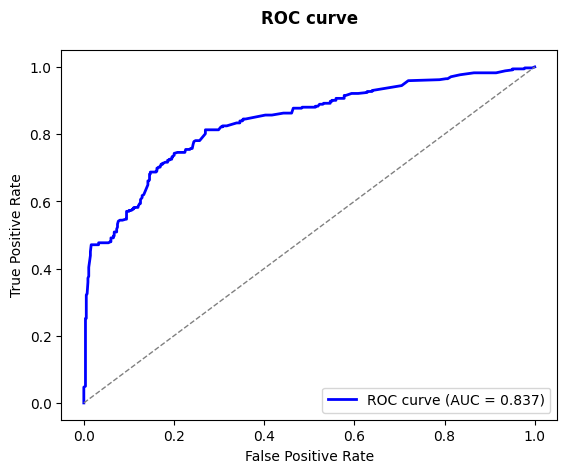

In [63]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = result.predict(x)
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # линия случайного классификатора
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve', fontweight='bold', y=1.05)
plt.legend(loc="lower right")
plt.show()

The model classifies passengers fairly well

In [64]:
print(f"McFadden R²: {result.prsquared:.3f}")

McFadden R²: 0.324


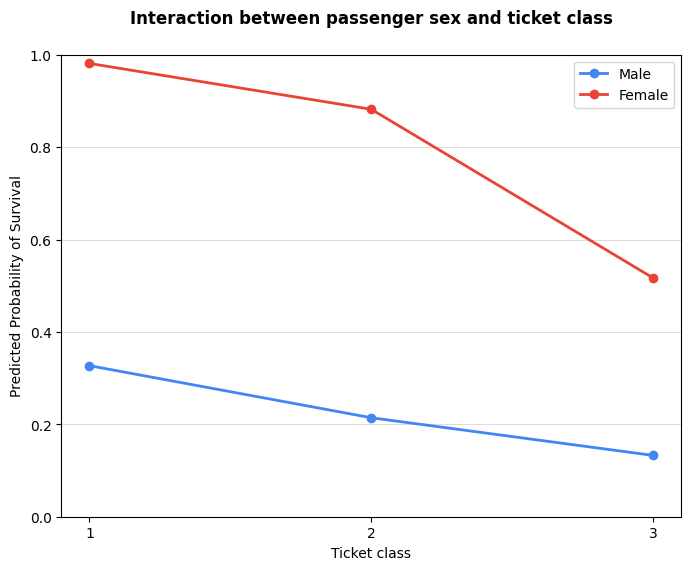

In [65]:
b = result.params

fare_mean = train_df['Fare_log'].mean()

pclass_vals = [1, 2, 3]
sex_vals = [0, 1]
colors = {'Male': '#4285F4', 'Female': '#EA4335'}

plt.figure(figsize=(8,6))

plt.grid(True, axis='y', alpha=0.6, linestyle='-', linewidth=0.5)

for s in sex_vals:
    probs = []
    for p in pclass_vals:
        logit = (b['const']
                + b['Pclass'] * p
                + b['Sex_int'] * s
                + b['Fare_log'] * fare_mean
                + b['Pclass*Sex_int'] * (p * s))
        prob = 1 / (1 + np.exp(-logit))
        probs.append(prob)
    
    label = 'Female' if s == 1 else 'Male'
    
    plt.plot(pclass_vals, probs, marker='o', label=label, 
             linewidth=2, color=colors[label])

plt.xlabel('Ticket class')
plt.ylabel('Predicted Probability of Survival')
plt.title('Interaction between passenger sex and ticket class',
          fontweight='bold', y=1.05)
plt.legend()
plt.xticks([1, 2, 3])
plt.ylim(0, 1)
plt.show()

First-class women are almost guaranteed to survive, but third-class men are almost always died

---

### Use our model

In [66]:
test_df['Fare_log'] = np.log1p(test_df['Fare'])
test_df['Sex_int'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['Pclass*Sex_int'] = test_df['Pclass'] * test_df['Sex_int']

X_test = test_df[['Pclass', 'Sex_int', 'Fare_log', 'Pclass*Sex_int']]
X_test = sm.add_constant(X_test)

With probability > 0.5 will be assigned 1 (Survivor)

In [67]:
survival_probabilities = result.predict(X_test)
survival_predictions = (survival_probabilities > 0.5).astype(int)

test_df['Survived_pred'] = survival_predictions
test_df['Survived_prob'] = survival_probabilities

In [68]:
print(test_df[['Sex', 'Pclass', 'Age', 'Survived_pred', 'Survived_prob']].head(20))

       Sex  Pclass   Age  Survived_pred  Survived_prob
0     male       3  34.5              0       0.124455
1   female       3  47.0              0       0.496052
2     male       2  62.0              0       0.205001
3     male       3  27.0              0       0.125382
4   female       3  22.0              1       0.507986
5     male       3  14.0              0       0.125967
6   female       3  30.0              0       0.497833
7     male       2  26.0              0       0.221281
8   female       3  18.0              0       0.496717
9     male       3  21.0              0       0.135590
10    male       3   NaN              0       0.124532
11    male       1  46.0              0       0.333916
12  female       1  23.0              1       0.983556
13    male       2  63.0              0       0.219577
14  female       1  47.0              1       0.983105
15  female       2  24.0              1       0.885721
16    male       2  35.0              0       0.208433
17    male

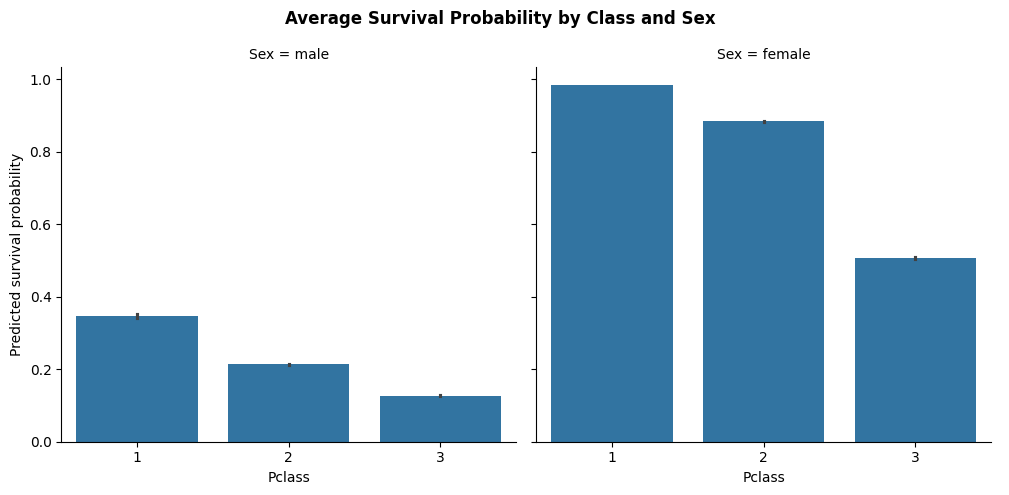

In [69]:
g = sns.catplot(data=test_df,
                x='Pclass',
                y='Survived_prob',
                col='Sex',
                kind='bar', 
                estimator=np.mean)

g.set_ylabels('Predicted survival probability')
plt.suptitle('Average Survival Probability by Class and Sex', fontweight='bold')
plt.tight_layout()
plt.show()

---

In [70]:
import shutil

folder_path = './titanic_data'

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"Folder {folder_path} succeful delited")
else:
    print(f"Folder {folder_path} does not exist")

Folder ./titanic_data succeful delited
